In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('C:/Users/user/Downloads/train.csv')

# understand the data
#  PassengerId: A unique index for each passenger.
#  Survived: 0 = No, 1 = Yes
#  Pclass: Ticket class
#  Name: Name
#  Age: Age in years
#  SibSp: # of siblings / spouses aboard the Titanic
#  Parch: # of parents / children aboard the Titanic
#  Ticket: Ticket number
#  Fare: Passenger fare
#  Cabin: Cabin number

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# check for missing values
print(data.isnull().sum())

# 0 - 70years old  177 missing values
# 35 years
# 25 years

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# see type of data in age and cabin
print(data['Age'].dtype)
print(data['Cabin'].dtype)

print(data['Age'].unique())
print(data['Cabin'].unique())

float64
object
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 

In [12]:
# lets replace the missing age with mean and the missing cabin with 'U' for unknown
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna('U')

In [13]:
print(data['Cabin'].unique())

['U' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


<Axes: xlabel='Survived', ylabel='count'>

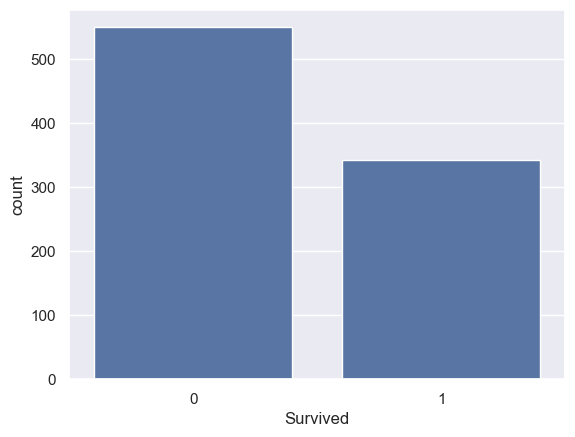

In [14]:
# use seaborn to view the data
sns.set(style='darkgrid')
sns.countplot(x='Survived', data=data)

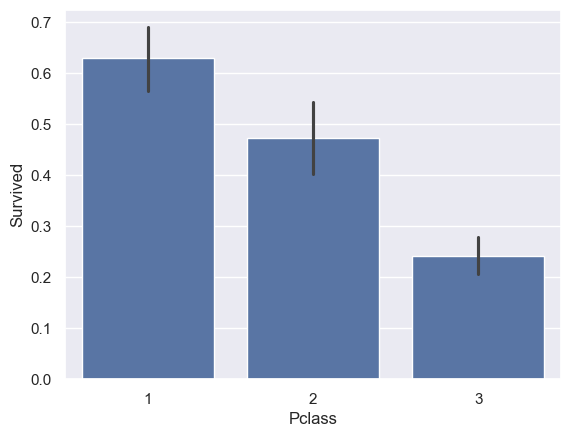

In [15]:
sns.barplot(x="Pclass", y="Survived", data=data)
plt.show()

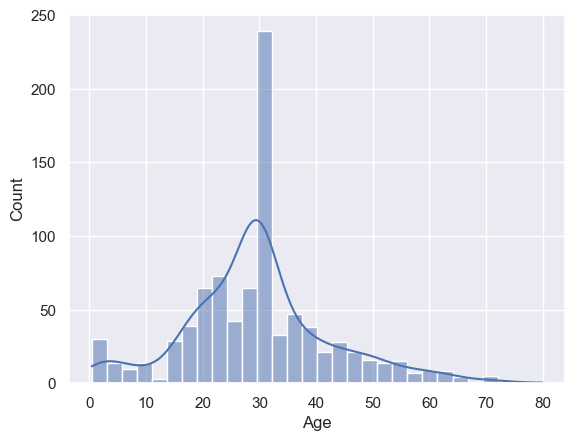

In [16]:
# age distribution

sns.histplot(data["Age"], bins=30, kde=True)
plt.show()

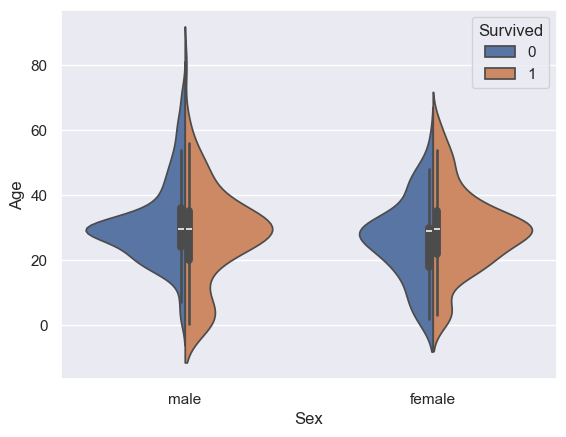

In [17]:
sns.violinplot(x="Sex", y="Age", data=data, hue="Survived", split=True)
plt.show()

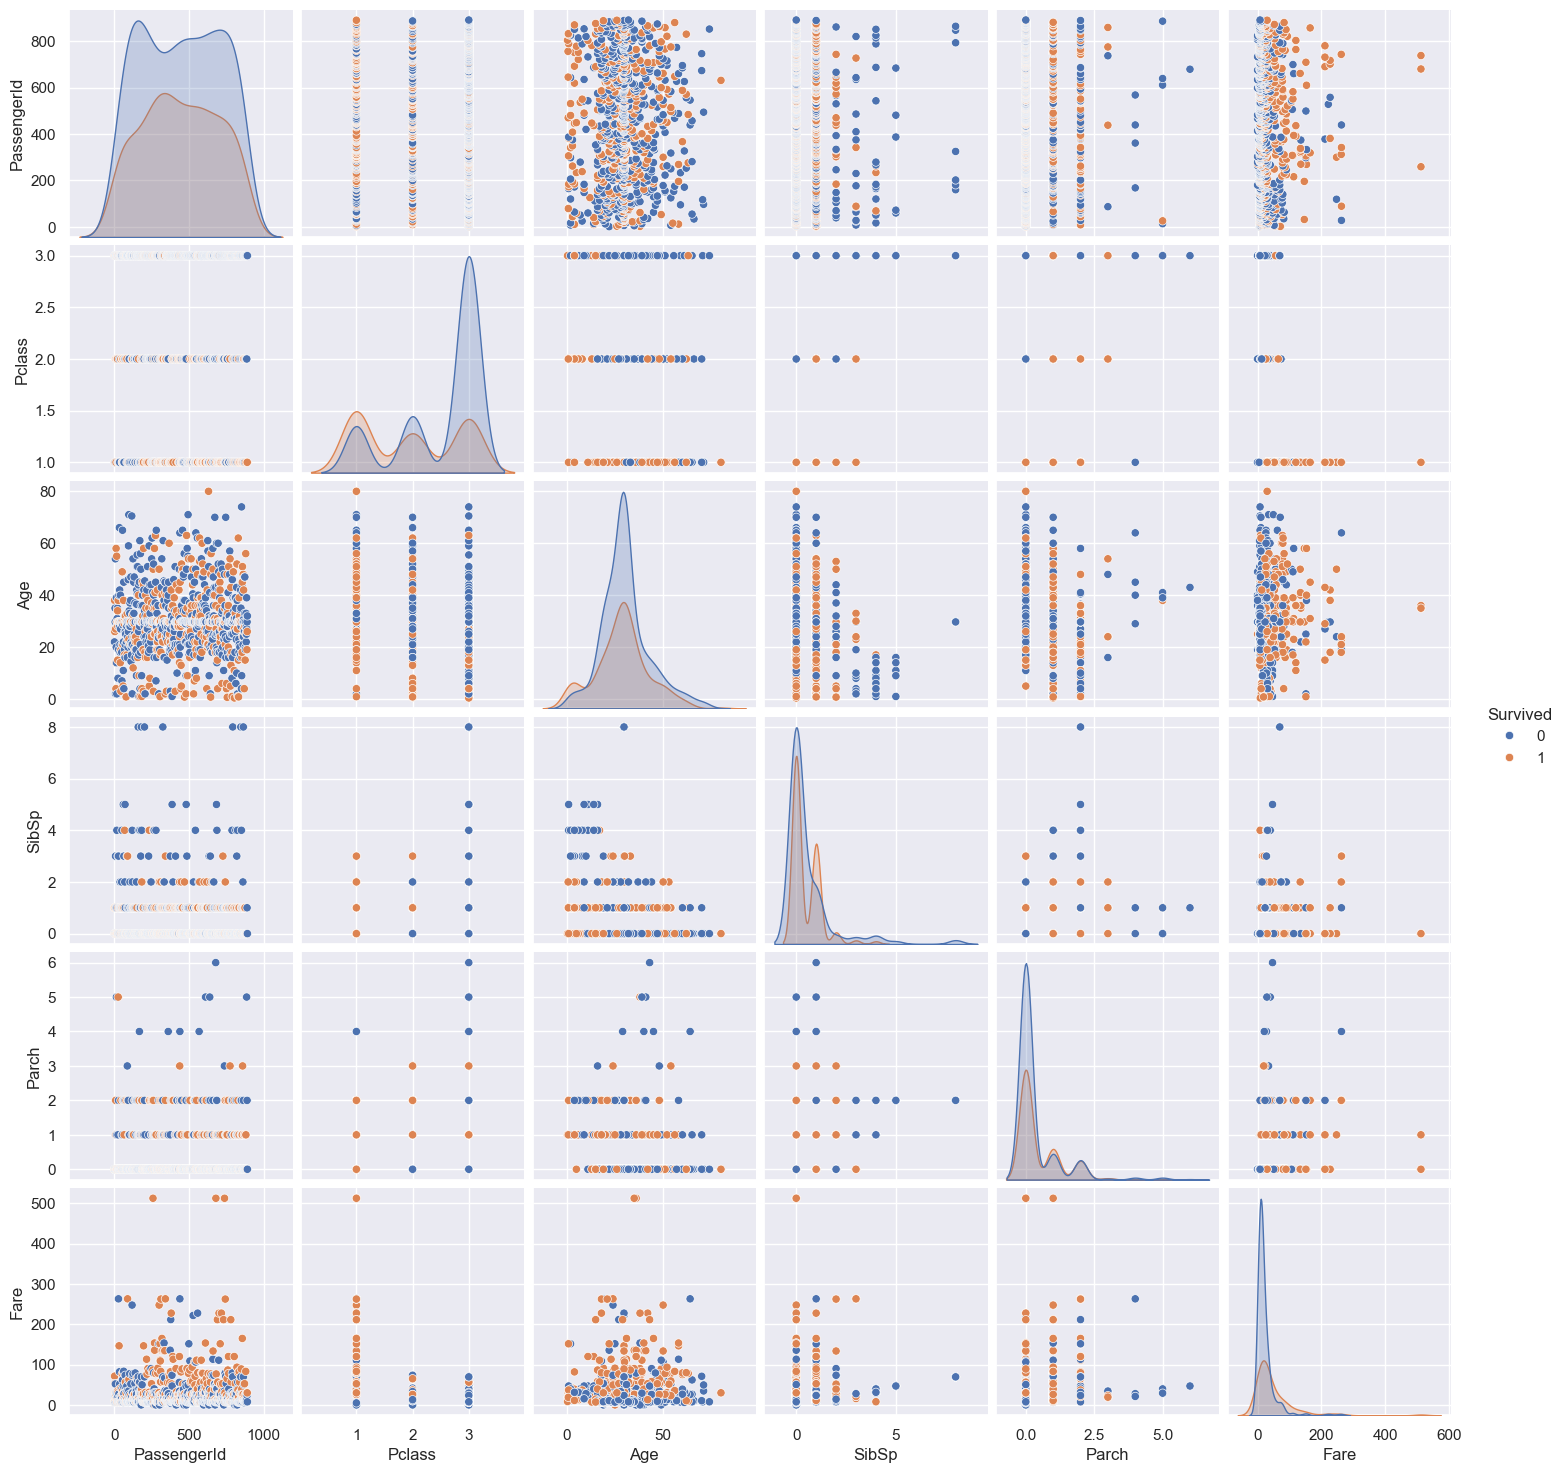

In [18]:
sns.pairplot(data, hue="Survived")

In [55]:
# Assignment
# install scikit-learn
# Encode the categorical data
# from sklearn.preprocessing import LabelEncoder
#  drop name column
data = data.drop('Name', axis=1)
# label encode  sex column, cabin column, ticket,  embarked column,
# label_encoder = LabelEncoder()
# Draw some plots to visualize the data in the categorical columns
# save the data set to a new csv file

In [57]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,U,S


In [85]:
from sklearn.preprocessing import LabelEncoder


In [87]:
label_encoder = LabelEncoder()

In [83]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [105]:
label_encoder.fit(data['Sex'])

LabelEncoder()

In [108]:
data['Sex'] = label_encoder.transform(data['Sex']) 
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,U,S


In [114]:
data['Cabin'].unique()

array([147,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

In [110]:
label_encoder.fit(data['Cabin'])
data['Cabin'] = label_encoder.transform(data['Cabin'])

In [112]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,0,35.0,1,0,113803,53.1000,55,S
4,5,0,3,1,35.0,0,0,373450,8.0500,147,S


In [116]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [118]:
label_encoder.fit(data['Embarked'])
data['Embarked'] = label_encoder.transform(data['Embarked'])

In [120]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,1,35.0,0,0,373450,8.0500,147,2


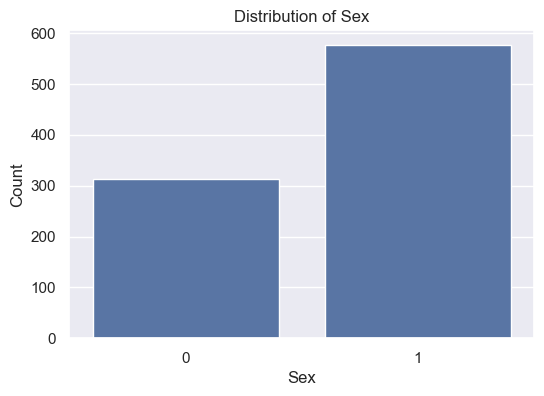

In [124]:
# Plot for Sex column 
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Sex'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

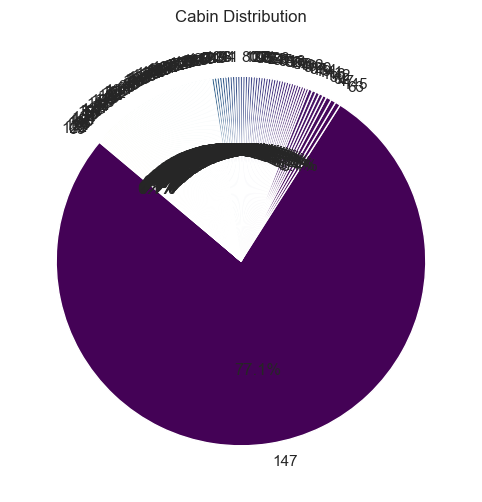

In [137]:
# Cabin Pie Chart
cabin_counts = data['Cabin'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(cabin_counts, labels=cabin_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("viridis", len(cabin_counts)))
plt.title("Cabin Distribution")
plt.show()

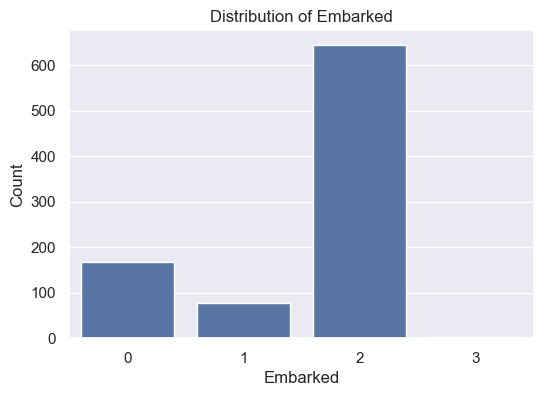

In [143]:
# Plot for Embarked column 
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Embarked'])
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [157]:
# Saving the dataset to a new CSV file
data.to_csv("C:/Users/user/Downloads/new_dataset.csv", index=True)